In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/ML/python/data/Spam Email raw text for NLP.csv',delimiter=',')
df.head(10)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
5,1,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...,00187.efd97ab2034b3384606e21db00014ecb
6,1,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",00500.85b72f09f6778a085dc8b6821965a76f
7,1,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,00493.1c5f59825f7a246187c137614fb1ea82
8,1,"<table width=""600"" border=""20"" align=""center"" ...",00012.381e4f512915109ba1e0853a7a8407b2
9,1,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",00487.139a2f4e8edbbdd64441536308169d74


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [3]:
df.isna().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['MESSAGE'] = df['MESSAGE'].str.lower()
print(df['MESSAGE'])

0       dear homeowner,\n\n \n\ninterest rates are at ...
1       attention: this is a must for all computer use...
2       this is a multi-part message in mime format.\n...
3       important information:\n\n\n\nthe new domain n...
4       this is the bottom line.  if you can give away...
                              ...                        
5791    i'm one of the 30,000 but it's not working ver...
5792    damien morton quoted:\n\n>w3c approves html 4 ...
5793    on mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794    once upon a time, manfred wrote :\n\n\n\n> i w...
5795    if you run pick, and then use the "new ftoc" b...
Name: MESSAGE, Length: 5796, dtype: object


In [6]:
#remove html tags
def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['MESSAGE'] = df['MESSAGE'].apply(remove_html_tags)
print(df['MESSAGE'])

0       dear homeowner,\n\n \n\ninterest rates are at ...
1       attention: this is a must for all computer use...
2       this is a multi-part message in mime format.\n...
3       important information:\n\n\n\nthe new domain n...
4       this is the bottom line.  if you can give away...
                              ...                        
5791    i'm one of the 30,000 but it's not working ver...
5792    damien morton quoted:\n\n>w3c approves html 4 ...
5793    on mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794    once upon a time, manfred wrote :\n\n\n\n> i w...
5795    if you run pick, and then use the "new ftoc" b...
Name: MESSAGE, Length: 5796, dtype: object


In [7]:
#remove url links

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

df['MESSAGE'] = df['MESSAGE'].apply(remove_url)
print(df['MESSAGE'])

0       dear homeowner,\n\n \n\ninterest rates are at ...
1       attention: this is a must for all computer use...
2       this is a multi-part message in mime format.\n...
3       important information:\n\n\n\nthe new domain n...
4       this is the bottom line.  if you can give away...
                              ...                        
5791    i'm one of the 30,000 but it's not working ver...
5792    damien morton quoted:\n\n>w3c approves html 4 ...
5793    on mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794    once upon a time, manfred wrote :\n\n\n\n> i w...
5795    if you run pick, and then use the "new ftoc" b...
Name: MESSAGE, Length: 5796, dtype: object


In [8]:
#remove punctuations
PUNC = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNC))


df['MESSAGE'] = df['MESSAGE'].apply(remove_punctuation)
print(df['MESSAGE'])

0       dear homeowner\n\n \n\ninterest rates are at t...
1       attention this is a must for all computer user...
2       this is a multipart message in mime format\n\n...
3       important information\n\n\n\nthe new domain na...
4       this is the bottom line  if you can give away ...
                              ...                        
5791    im one of the 30000 but its not working very w...
5792    damien morton quoted\n\nw3c approves html 4 em...
5793    on mon 20020722 at 0650 che wrote\n\n\n\n that...
5794    once upon a time manfred wrote \n\n\n\n i woul...
5795    if you run pick and then use the new ftoc butt...
Name: MESSAGE, Length: 5796, dtype: object


In [9]:
#lame
#remove \d,whitespaces ect.
#hate hard-coding
#looks bad

df['MESSAGE'] = df['MESSAGE'].str.replace("\d","")
df['MESSAGE'] = df['MESSAGE'].str.replace("[^\w\s]","")
df['MESSAGE'] = df['MESSAGE'].str.replace("tr","")
df['MESSAGE'] = df['MESSAGE'].str.replace("td","")
df['MESSAGE'] = df['MESSAGE'].str.replace("br","")
df['MESSAGE'] = df['MESSAGE'].str.replace("p","")
df['MESSAGE'] = df['MESSAGE'].str.replace("u","")
df['MESSAGE'] = df['MESSAGE'].str.replace("\n","")
df['MESSAGE'] = df['MESSAGE'].str.replace("ot","")
print(df['MESSAGE'])

0       dear homeowner interest rates are at their low...
1       attention this is a mst for all comter sersnew...
2       this is a mltiart message in mime formatnextar...
3       imortant informationthe new domain names are f...
4       this is the btom line  if yo can give away cds...
                              ...                        
5791    im one of the  bt its n working very well this...
5792    damien morton qedwc aroves html  emitags  now ...
5793    on mon  at  che wre thats the correct lines to...
5794    once on a time manfred wre  i wold like to ins...
5795    if yo rn ick and then se the new ftoc btton to...
Name: MESSAGE, Length: 5796, dtype: object


In [10]:
#removing stopwords
nltk.download("stopwords")

sw = list(stopwords.words("english"))


def remove_stopwords(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    stopwords_set = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_set]
    return ' '.join(filtered_tokens)

df['MESSAGE'] = df['MESSAGE'].apply(remove_stopwords)
print(df['MESSAGE'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       dear homeowner interest rates lowest oint year...
1       attention mst comter sersnewsecial ackage deal...
2       mltiart message mime formatnextartcdccbfaconte...
3       imortant informationthe new domain names final...
4       btom line yo give away cds free eole like one ...
                              ...                        
5791    im one bt n working well week thetes dates ser...
5792    damien morton qedwc aroves html emitags yoll a...
5793    mon che wre thats correct lines added sorcesli...
5794    time manfred wre wold like install rm ied get ...
5795    yo rn ick se new ftoc btton show onlythose mes...
Name: MESSAGE, Length: 5796, dtype: object


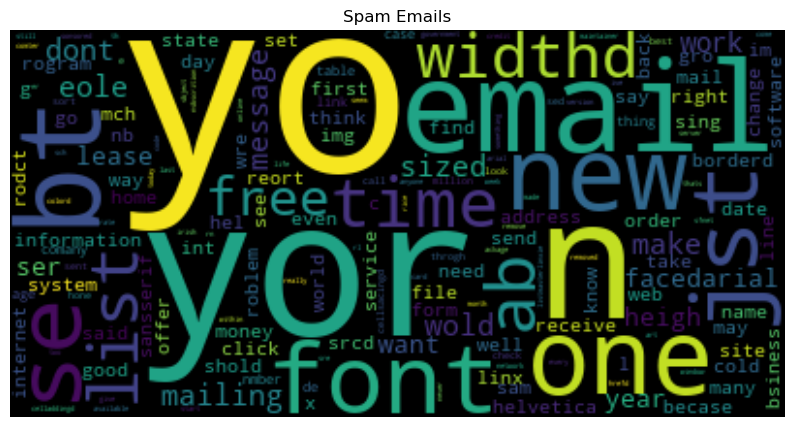

In [11]:
#wordcloud to show frequency or words
word_cloud_text = " ".join(df['MESSAGE'])


wordcloud = WordCloud(background_color="black", collocations=False).generate(word_cloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Emails")
plt.show()


In [12]:
cv = CountVectorizer()



X = df['MESSAGE']
X = cv.fit_transform(X)
y = df['CATEGORY']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



MNB = MultinomialNB()
lr = LogisticRegression()
PC = PassiveAggressiveClassifier()


def evaluate_spam(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --CLF RPT-- {clf_rpt}')
    return pred


lr_pred = evaluate_spam(X_train, X_test, y_train, y_test, lr)
PC_pred = evaluate_spam(X_train, X_test, y_train, y_test, PC)
MNB_pred = evaluate_spam(X_train, X_test, y_train, y_test, MNB)

LogisticRegression, --ACC-- 98.79%; --CLF RPT--               precision    recall  f1-score   support

           0       0.99      0.99      0.99       762
           1       0.98      0.98      0.98       398

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160

PassiveAggressiveClassifier, --ACC-- 98.79%; --CLF RPT--               precision    recall  f1-score   support

           0       0.99      0.99      0.99       762
           1       0.98      0.99      0.98       398

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160

MultinomialNB, --ACC-- 98.88%; --CLF RPT--               precision    recall  f1-score   support

           0       0.99      1.00      0.99       762
           1       0.99      0.97      0.98       398

    accuracy                      

<Axes: title={'center': 'Confusion Matrix for LogisticRegression'}>

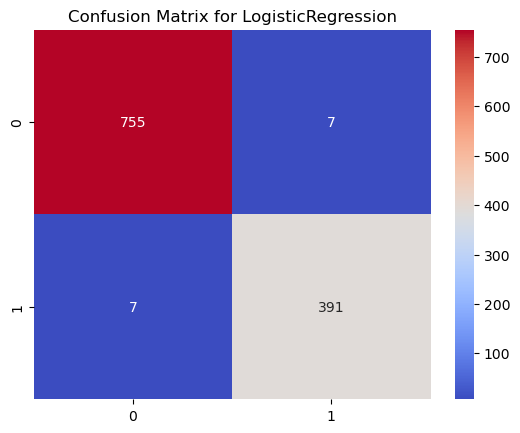

In [13]:
def confusion_matrix_plot(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    con = confusion_matrix(y_test,pred)
    heatmap = sns.heatmap(con,annot=True,fmt="d",cmap="coolwarm")
    heatmap.set_title(f'Confusion Matrix for {model.__class__.__name__}')
    return heatmap

confusion_matrix_plot(X_train, X_test, y_train, y_test, lr)

<Axes: title={'center': 'Confusion Matrix for PassiveAggressiveClassifier'}>

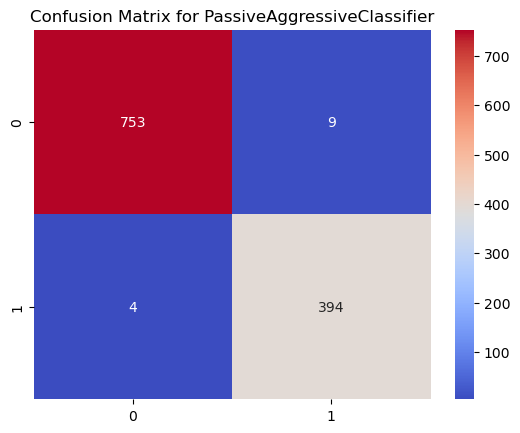

In [14]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, PC)


<Axes: title={'center': 'Confusion Matrix for MultinomialNB'}>

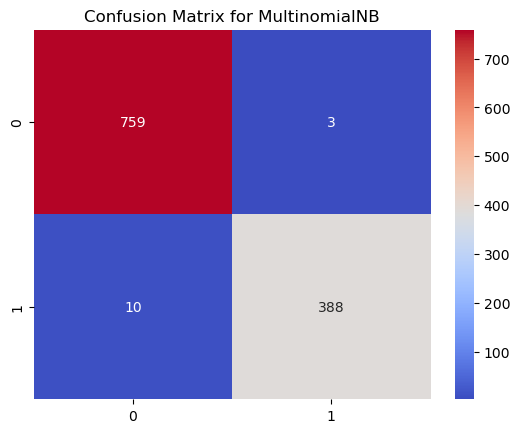

In [15]:
confusion_matrix_plot(X_train, X_test, y_train, y_test, MNB)